Mateus Gentil Dantas de Andrade
N°USP: 11317911

Projeto final SME0221 - Introdução à Inferência Estatística




#**Comparação entre Volatilidade e Dividend Yield.**

Este projeto tem como objetivo comparar a Volatilidade entre ativos com diferentes taxas de Dividendos pertencentes à bolsa de valores brasileira.

Os testes estatísticos contidos no notebook visam verificar a normalidade dos dados coletados e realizar as comparações adequadas em cada caso.



In [1]:
# Requisitos
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Coleta de dados

Os dados utilizados para os testes foram obtidos através da biblioteca `yfinance` e estão disponíveis em https://finance.yahoo.com/ assim como no csv disponibilizado juntamente com o notebook no projeto do github. A escolha dos ativos se deu por ordem de liquidez das empresas, ao escolher empresas líquidas garantimos a consistência dos valores observados e evitamos volatilidades ou Dividend Yield incomuns no mercado, tratando-se também de uma amostra balanceada entre as estatísticas observadas. Para tanto foram utilizados 50 ativos da bolsa brasileira, com observações de volatilidade e média de dividendos pagos entre os anos de 2020 e 2024.


*   Dividend Yield refere-se a uma métrica que mede $\frac{DividendoPago}{ValorAtivo}$ anualmente, logo, uma empresa que custe 100 reais por ação e tenha distribuído 10 reais por ação ao longo de um ano tem um Dividend Yield de 10%




In [2]:
# Lista de ativos
tickers = [
    'VALE3.SA', 'PETR4.SA', 'ITUB4.SA', 'BBDC4.SA', 'BBAS3.SA',
    'ABEV3.SA', 'WEGE3.SA', 'B3SA3.SA', 'MGLU3.SA', 'SUZB3.SA',
    'LREN3.SA', 'RADL3.SA', 'RENT3.SA', 'VIVT3.SA', 'EGIE3.SA',
    'ENBR3.SA', 'TAEE11.SA', 'CPLE6.SA', 'EQTL3.SA', 'HAPV3.SA',
    'GGBR4.SA', 'KLBN11.SA', 'PRIO3.SA', 'CSNA3.SA', 'ELET3.SA',
    'ELET6.SA', 'SBSP3.SA', 'BBSE3.SA', 'CXSE3.SA', 'BRFS3.SA',
    'CVCB3.SA', 'EMBR3.SA', 'AZUL4.SA', 'GOLL4.SA', 'BRKM5.SA',
    'BRML3.SA', 'IGTI11.SA', 'MULT3.SA', 'FLRY3.SA', 'PCAR3.SA',
    'MRVE3.SA', 'CYRE3.SA', 'USIM5.SA', 'PETZ3.SA', 'CASH3.SA',
    'YDUQ3.SA', 'ALPA4.SA', 'LWSA3.SA', 'VIIA3.SA', 'ARZZ3.SA'
]
start_date = "2020-01-01"
end_date = "2024-12-31"

In [3]:
def coletar_dados(tickers, start, end):
    dados = []
    for ticker in tickers:

        ativo = yf.Ticker(ticker)
        df = ativo.history(start=start, end=end)
        info = ativo.info

        if df.empty or 'Dividends' not in df.columns:
            continue
        df = df[['Close']].copy()
        df['Return'] = df['Close'].pct_change()
        volatilidade = df['Return'].std() * np.sqrt(252) # normalizado para 252 dias úteis
        dividendo = info.get('fiveYearAvgDividendYield')

        dados.append({
            'Ativo': ticker,
            'Volatilidade': volatilidade,
            'Dividend_Yield_Medio': dividendo
        })
    return pd.DataFrame(dados)

# Coleta
df_resultado = coletar_dados(tickers, start_date, end_date)
df_resultado = df_resultado.fillna(0)
df_resultado['Dividend_Yield_Medio'] = df_resultado['Dividend_Yield_Medio']/100  # transforma em valores percentuais de DY
df_resultado.head()

ERROR:yfinance:$ENBR3.SA: possibly delisted; no timezone found
ERROR:yfinance:$BRML3.SA: possibly delisted; no timezone found
ERROR:yfinance:$VIIA3.SA: possibly delisted; no timezone found
ERROR:yfinance:$ARZZ3.SA: possibly delisted; no timezone found


,Ativo,Volatilidade,Dividend_Yield_Medio
0,VALE3.SA,0.375992,0.0943
1,PETR4.SA,0.445918,0.2041
2,ITUB4.SA,0.321672,0.0352
3,BBDC4.SA,0.372746,0.0488
4,BBAS3.SA,0.369000,0.0514


# Classificação dos Ativos conforme Dividend Yield

Para testar a relação entre a Volatilidade e o Dividend Yield dos ativos criou-se uma variável categórica para classificar os grupos de ativos conforme a política de dividendos. Seguindo a literatura econômica, os ativos com Dividend Yield > 6% ao ano foram classificados como Alto DY, entre 0 e 6 Baixo DY e ainda contamos com o grupo de empresas que não pagam dividendos.


In [ ]:
def classificar_dy(x):
    if x == 0:
        return '0 DY'
    elif 0 < x < 0.06:
        return 'Baixo DY'
    else:  # x >= 6%
        return 'Alto DY'

df_resultado['Categoria_DY'] = df_resultado['Dividend_Yield_Medio'].apply(classificar_dy)


# Análise exploratória

A Análise Exploratória dos Dados teve como objetivo entender as principais características das variáveis envolvidas no estudo: Volatilidade dos ativos e Dividend Yield médio anualizado. Para isso, utilizamos estatísticas descritivas e visualizações gráficas.

Priramente foi gerado um boxplot sobre as classificações, que calcula a média, mediana, desvio padrão, valores mínimos e máximos tanto para a Volatilidade quanto para o Dividend Yield. Revelando informações sobre a tendência central e a dispersão das variáveis.

Ao analisar o boxplot gerado, é possível identificar visualmente uma tendência de diferença nas medianas observadas em cada grupo, as investigações seguintes visarão concluir se as diferenças observadas são estatisticamente significantes.


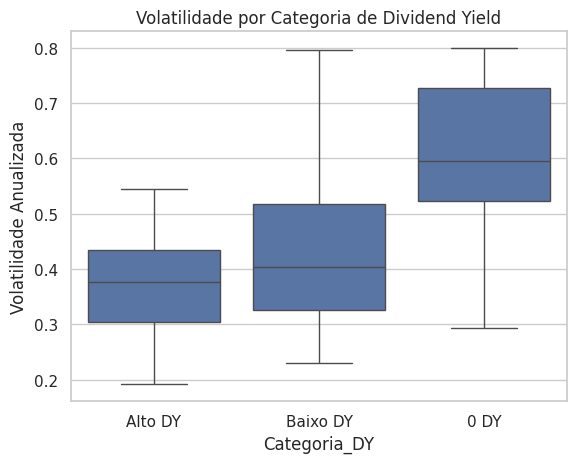

In [ ]:

# Boxplot
sns.boxplot(data=df_resultado, x='Categoria_DY', y='Volatilidade')
plt.title("Volatilidade por Categoria de Dividend Yield")
plt.ylabel("Volatilidade Anualizada")
plt.show()

In [ ]:
df_resultado.to_csv('dataset.csv', index=False) # salva o dataset em um arquivo csv
df_resultado.head()

,Ativo,Volatilidade,Dividend_Yield_Medio,Categoria_DY
0,VALE3.SA,0.375592,0.0943,Alto DY
1,PETR4.SA,0.448557,0.2041,Alto DY
2,ITUB4.SA,0.320471,0.0352,Baixo DY
3,BBDC4.SA,0.372746,0.0488,Baixo DY
4,BBAS3.SA,0.368729,0.0514,Baixo DY



# Testes de Normalidade

Para aplicar os testes e comparar as médias das variáveis, é necessário testar a normalidade dos dados. Dessa forma, é possível escolher entre a aplicação de testes paramétricos e não paramétricos de forma a minimizar a possiblidade de erros.

O primeiro teste de normalidade realizado foi Shapiro-Wilk:

Este teste verifica se os dados de cada grupo seguem uma **distribuição normal**.

A hipótese nula (H₀) é que os dados **são normalmente distribuídos**.
- **H₀**: Os dados seguem distribuição normal.
- **H₁**: Os dados **não** seguem distribuição normal.
> Se o p-valor for **menor que 0.05**, rejeitamos H₀ e concluímos que os dados **não** são normais.

In [ ]:
from scipy.stats import shapiro, probplot
import matplotlib.pyplot as plt

# Separando os grupos
grupo_zero = df_resultado[df_resultado['Categoria_DY'] == '0 DY']['Volatilidade']
grupo_baixo = df_resultado[df_resultado['Categoria_DY'] == 'Baixo DY']['Volatilidade']
grupo_alto = df_resultado[df_resultado['Categoria_DY'] == 'Alto DY']['Volatilidade']

# Shapiro-Wilk
stat_zero, p_zero = shapiro(grupo_zero)
stat_baixo, p_baixo = shapiro(grupo_baixo)
stat_alto, p_alto = shapiro(grupo_alto)

print(f'0 DY       - p-valor: {p_zero:.4f}')
print(f'Baixo DY   - p-valor: {p_baixo:.4f}')
print(f'Alto DY    - p-valor: {p_alto:.4f}')



0 DY       - p-valor: 0.1737
Baixo DY   - p-valor: 0.0926
Alto DY    - p-valor: 0.9952


Como para todos os grupos o p-valor identificado foi superior a 0.05 conclui-se pelo teste de hipótese em não rejeitar a hipótese nula e considerar a normalidade dos dados.

Ainda com o objetivo de visualizar a normalidade dos dados identificada pelo teste Shapiro-Wilk, foi gerado o QQ-Plot (Quantile-Quantile Plot), gráfico que compara os quantis dos dados amostrais com os quantis esperados de uma distribuição normal.
- Se os pontos seguirem aproximadamente uma linha reta, os dados seguem distribuição normal.

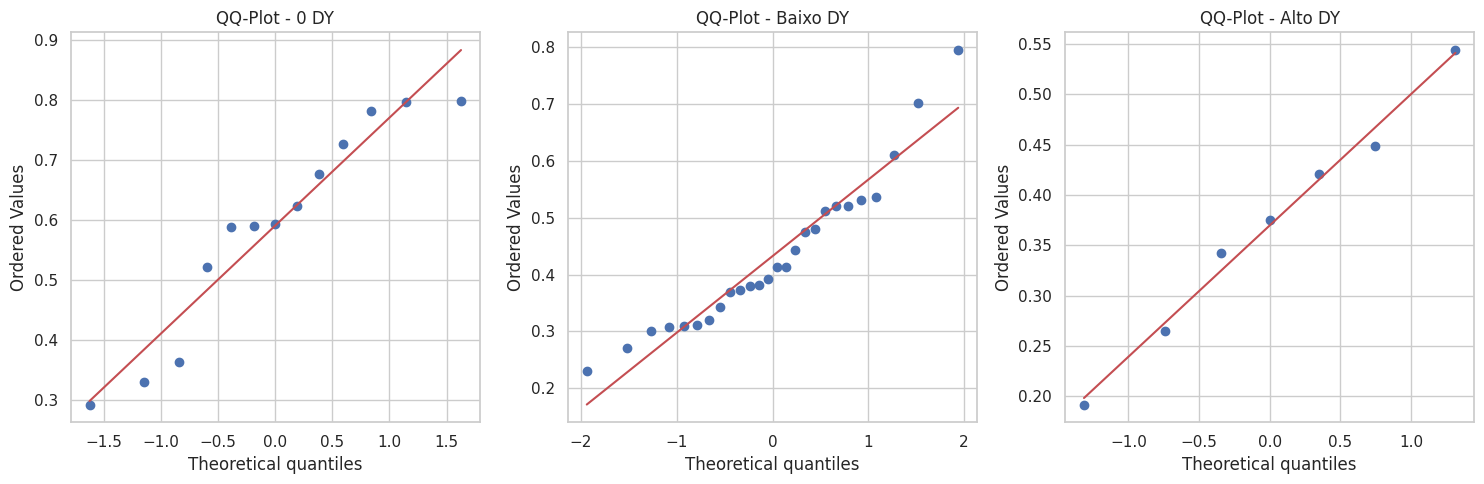

In [ ]:

# QQ-plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
probplot(grupo_zero, dist="norm", plot=axs[0])
axs[0].set_title("QQ-Plot - 0 DY")
probplot(grupo_baixo, dist="norm", plot=axs[1])
axs[1].set_title("QQ-Plot - Baixo DY")
probplot(grupo_alto, dist="norm", plot=axs[2])
axs[2].set_title("QQ-Plot - Alto DY")
plt.tight_layout()
plt.show()

# Testes de Comparação de Médias
Após a análise exploratória e os testes de normalidade, procede-se à comparação da Volatilidade média dos ativos entre os três grupos definidos pelo Dividend Yield, o objetivo é verificar se existe diferença estatisticamente significativa entre as médias de Volatilidade desses grupos.

Para determinar o teste adequado, verificamos previamente se os dados dos grupos apresentavam distribuição normal por meio do teste de Shapiro-Wilk e QQ-plots.

Como todos os grupos apresentaram distribuição normal, foi utilizado o teste ANOVA (Análise de Variância), que compara as médias populacionais de três ou mais grupos.

O Teste ANOVA (Análise de Variância) testa se **ao menos uma média populacional é diferente** das demais entre **3 ou mais grupos independentes**.
- **H₀**: Todas as médias são iguais.
- **H₁**: Pelo menos uma média é diferente.
> A ANOVA pressupõe que os dados sejam **normais** e com **variâncias semelhantes** entre os grupos.

Para complementar a funcionalidade do notebook a possíveis adições de ativos em diferentes testes, foi adicionado o caso em que pelo menos um grupo não apresente normalidade, aplicando-se o teste Kruskal-Wallis, uma alternativa não-paramétrica que compara as distribuições entre os grupos, sendo menos sensível a violações de normalidade.

 O Teste de Kruskal-Wallis é um teste **não-paramétrico** usado para comparar **3 ou mais grupos** quando a suposição de normalidade **não é atendida**.
 - **H₀**: As distribuições dos grupos são iguais.
 - **H₁**: Pelo menos uma distribuição difere.
 > Utiliza-se quando ao menos um dos grupos falha no teste de normalidade.


In [ ]:
from scipy.stats import f_oneway, kruskal

# Avaliar normalidade anterior (com base em p_zero, p_baixo, p_alto)
if p_zero > 0.05 and p_baixo > 0.05 and p_alto > 0.05:
    stat, p_valor = f_oneway(grupo_zero, grupo_baixo, grupo_alto)
    metodo = "ANOVA (paramétrico)"
else:
    stat, p_valor = kruskal(grupo_zero, grupo_baixo, grupo_alto)
    metodo = "Kruskal-Wallis (não paramétrico)"

print(f"Método: {metodo}")
print(f"p-valor: {p_valor:.4f}")

if p_valor < 0.05:
    print("Resultado: Rejeitamos H₀. Há diferença significativa nas volatilidades médias entre os grupos.")
else:
    print("Resultado: Não rejeitamos H₀. Não há evidência estatística suficiente para identificar diferença nas volatilidades entre os grupos.")


Método: ANOVA (paramétrico)
p-valor: 0.0020
Resultado: Rejeitamos H₀. Há diferença significativa nas volatilidades entre os grupos.


# Conclusão

A partir dos testes realizados sobre os dados coletados, e seguindo os resultados dos testes de hipóteses, é possível identificar que pelo menos um dos grupos apresentou médias de volatilidade significativamente diferente dos demais.  Existem portanto, com os testes realizados, evidências para afirmar que empresas que tiveram políticas de pagamentos de Dividendos diferentes não tiveram a mesma Volatilidade no período de 2020 a 2024 na bolsa de valores brasileira.

Seguindo o indicado pela análise exploratória e pela mediana dos valores de Volatilidade em cada grupo gerada no Boxplot, existem indícios de que o grupo que não paga Dividendos (grupo 0 DY) possua a Volatilidade significativamente diferente dos demais. Para testar tais indícios, é possível como próximos passos realizar testes de Comparação Múltipla feitos dois a dois, como os testes Tukey, Duncan ou SNK, com o objetivo de identificar quais pares de grupos especificamente apresentaram diferença estatística.

*Fontes*:

https://finance.yahoo.com/

BUSSAB, W. O.; MORETTIN, P. A. Estatística Básica. 6. ed. São Paulo: Saraiva, 2002.

BLACK, Fischer; SCHOLES, Myron. The effects of dividend yield and dividend policy on common stock prices and returns. Journal of Financial Economics, v. 1, n. 1, p. 1–22, 1974.
